In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

This is the May 7, 2015 Version of dataset, as published at https://www.cs.cmu.edu/~./enron/

Those 1,700 records that were labeled by students are marked with labeled set were labelled by CMU students.

There are up to 12 categories per email:

Cat_[1-12]_level_1 = top-level category
Cat_[1-12]_level_2 = second-level category
Cat_[1-12]_level_weight = frequency with which this category was assigned to this message
Here are the categories:

1 Coarse genre
1.1 Company Business, Strategy, etc. (elaborate in Section 3 [Topics]) (855 cnt.)
1.2 Purely Personal (49 cnt.)
1.3 Personal but in professional context (e.g., it was good working with you) (165 cnt.)
1.4 Logistic Arrangements (meeting scheduling, technical support, etc) (533 cnt.)
1.5 Employment arrangements (job seeking, hiring, recommendations, etc) (96 cnt.)
1.6 Document editing/checking (collaboration) (176 cnt.)
1.7 Empty message (due to missing attachment) (25 cnt.)
1.8 Empty message (26 cnt.)
2 Included/forwarded information
2.1 Includes new text in addition to forwarded material (680 cnt.)
2.2 Forwarded email(s) including replies (913 cnt.)
2.3 Business letter(s) / document(s) (42 cnt.)
2.4 News article(s) (124 cnt.)
2.5 Government / academic report(s) (15 cnt.)
2.6 Government action(s) (such as results of a hearing, etc) (25 cnt.)
2.7 Press release(s) (13 cnt.)
2.8 Legal documents (complaints, lawsuits, advice) (22 cnt.)
2.9 Pointers to url(s) (55 cnt.)
2.10 Newsletters (18 cnt.)
2.11 Jokes, humor (related to business) (7 cnt.)
2.12 Jokes, humor (unrelated to business) (6 cnt.)
2.13 Attachment(s) (assumed missing) (311 cnt.)
3 Primary topics (if coarse genre 1.1 is selected)
3.1 regulations and regulators (includes enron caps) (203 cnt.)
3.2 internal projects -- progress and strategy (125 cnt.)
3.3 company image -- current (71 cnt.)
3.4 company image -- changing / influencing (63 cnt.)
3.5 political influence / contributions / contacts (108 cnt.)
3.6 california energy crisis / california politics (249 cnt.)
3.7 internal company policy (83 cnt.)
3.8 internal company operations (107 cnt.)
3.9 alliances / partnerships (64 cnt.)
3.10 legal advice (77 cnt.)
3.11 talking points (26 cnt.)
3.12 meeting minutes (33 cnt.)
3.13 trip reports (7 cnt.)
4 Emotional tone (if not neutral)
4.1 jubilation (12 cnt.)
4.2 hope / anticipation (20 cnt.)
4.3 humor (22 cnt.)
4.4 camaraderie (20 cnt.)
4.5 admiration (13 cnt.)
4.6 gratitude (21 cnt.)
4.7 friendship / affection (13 cnt.)
4.8 sympathy / support (7 cnt.)
4.9 sarcasm (18 cnt.)
4.10 secrecy / confidentiality (130 cnt.)
4.11 worry / anxiety (28 cnt.)
4.12 concern (38 cnt.)
4.13 competitiveness / aggressiveness (8 cnt.)
4.14 triumph / gloating (3 cnt.)
4.15 pride (3 cnt.)
4.16 anger / agitation (10 cnt.)
4.17 sadness / despair (2 cnt.)
4.18 shame (1 cnt.)
4.19 dislike / scorn (9 cnt.)

In [24]:
# Step 2 - load the data
import pandas as pd
enron_data = pd.read_csv('https://raw.githubusercontent.com/pierretd/DS-Sprint-01-Dealing-With-Data/master/Data/Absenteeism_at_work.csv', sep=';')


In [29]:
enron_data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [32]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
enron_data.describe(include='all')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


No handles with labels found to put in legend.


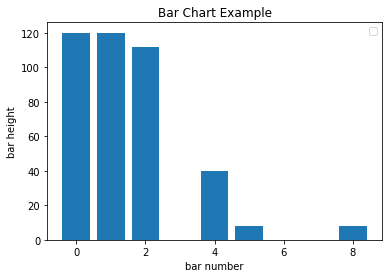

In [36]:
plt.bar(enron_data['Pet'], enron_data['Absenteeism time in hours'])
plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")

plt.show()

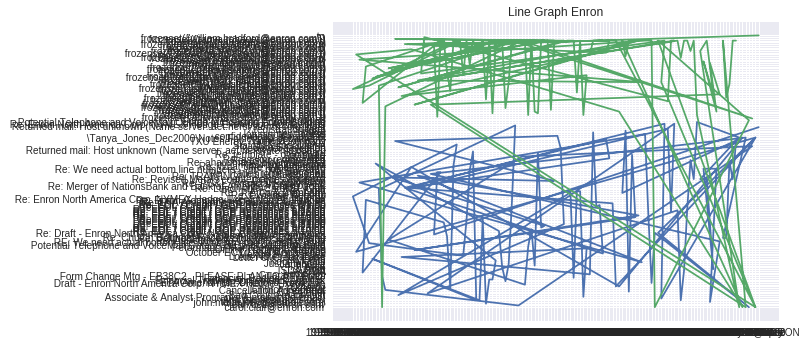

In [58]:
import matplotlib.pyplot as plt

x  = enron_data[2]
y1 = enron_data[5]
y2 = enron_data[4]
plt.plot(x, y1,)
plt.plot(x, y2, )
plt.plot()
plt.title("Line Graph Enron")
plt.show();

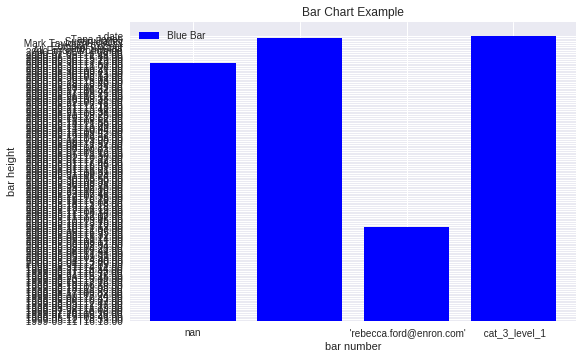

In [59]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = enron_data[21]
y1 = enron_data[2]



# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()


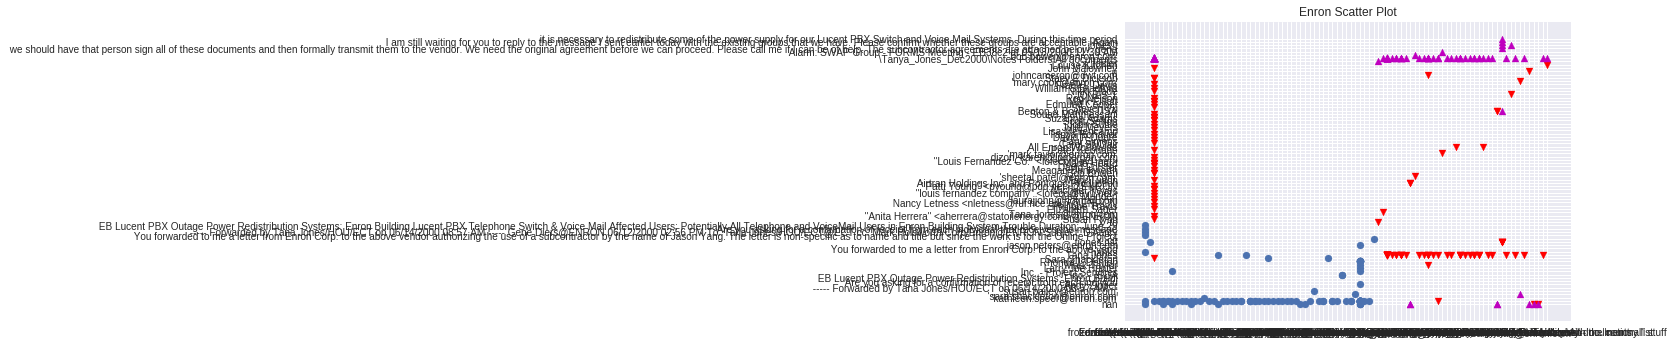

In [53]:
import matplotlib.pyplot as plt

x1 = enron_data[4]
y1 = enron_data[8]

x2 = enron_data[6]
y2 = enron_data[7]
y3 = enron_data[10]

# Markers: 
plt.scatter(x1, y1)
plt.scatter(x2, y2, marker='v', color='r')
plt.scatter(x2, y3, marker='^', color='m')
plt.title('Enron Scatter Plot')
plt.show()

Ok. Some of these graphs look like they might be telling a story, let's try to clean it up.

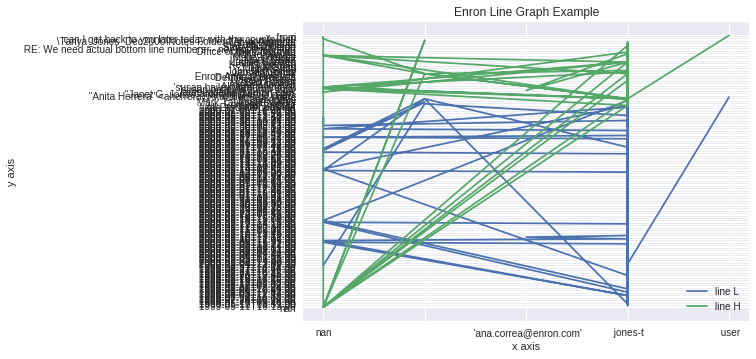

In [54]:
import matplotlib.pyplot as plt

x  = enron_data[14]
y1 = enron_data[2]
y2 = enron_data[6]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Enron Line Graph Example")
plt.legend()
plt.show()

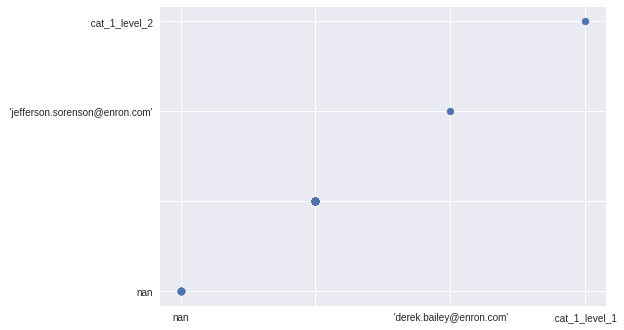

In [55]:
plt.scatter(enron_data[15], enron_data[16])

In [56]:
enron_data[16].describe()

count     111
unique      3
top          
freq      109
Name: 16, dtype: object

In [57]:
enron_data[15].describe()

count     111
unique      3
top          
freq      109
Name: 15, dtype: object